# СЕМИНАР 5: ЛИНЕЙНЫЕ МОДЕЛИ

Сегодня мы с Вами поработаем с данными о сообществах США: https://archive.ics.uci.edu/dataset/183/communities+and+crime

Будем пытаться предсказать количество насильственных преступлений относительно населения

Датасет доступен на Kaggle, в формате .csv: https://www.kaggle.com/kkanda/communities%20and%20crime%20unnormalized%20data%20set

In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/ipoly/OneDrive/Рабочий стол/МО 3 курс/Семинар5/crimedata.csv", sep='\s*,\s*', encoding='latin-1', na_values=["?"])

# оставим лишь нужные колонки
requiredColumns = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]
data = data[data.columns[requiredColumns]]

# некоторые значения целевой переменной пропущены
X = data.loc[data['ViolentCrimesPerPop'].notnull(), :].drop('ViolentCrimesPerPop', axis=1)
y = data['ViolentCrimesPerPop'][X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
data

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,...,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,41.02
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,...,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,127.56
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,...,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,218.59
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.00,20580,68.15,...,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,306.64
4,11245,2.76,24.46,40.53,28.69,12.65,0,0.00,17390,69.33,...,23.2,12.9,2,0,1.74,73.75,42.22,60.34,89.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,15.46,30.16,14.34,8.08,56216,100.00,24727,75.05,...,22.6,11.7,64,0,18.90,52.67,39.19,74.58,85.88,545.75
2211,12251,2.68,17.36,31.23,16.97,12.57,12251,100.00,20321,75.06,...,17.3,14.4,0,0,2.24,75.16,49.12,78.79,92.85,124.10
2212,32824,2.46,11.81,20.96,9.53,20.73,32824,100.00,27182,59.79,...,23.9,13.1,44,0,7.35,48.66,46.73,75.54,92.30,353.83
2213,13547,2.89,17.16,30.01,14.73,10.42,0,0.00,19899,71.67,...,23.3,14.1,0,0,2.28,82.26,54.05,79.72,94.06,691.17


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 89 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population             2215 non-null   int64  
 1   householdsize          2215 non-null   float64
 2   agePct12t21            2215 non-null   float64
 3   agePct12t29            2215 non-null   float64
 4   agePct16t24            2215 non-null   float64
 5   agePct65up             2215 non-null   float64
 6   numbUrban              2215 non-null   int64  
 7   pctUrban               2215 non-null   float64
 8   medIncome              2215 non-null   int64  
 9   pctWWage               2215 non-null   float64
 10  pctWFarmSelf           2215 non-null   float64
 11  pctWInvInc             2215 non-null   float64
 12  pctWSocSec             2215 non-null   float64
 13  pctWPubAsst            2215 non-null   float64
 14  pctWRetire             2215 non-null   float64
 15  medF

<Axes: >

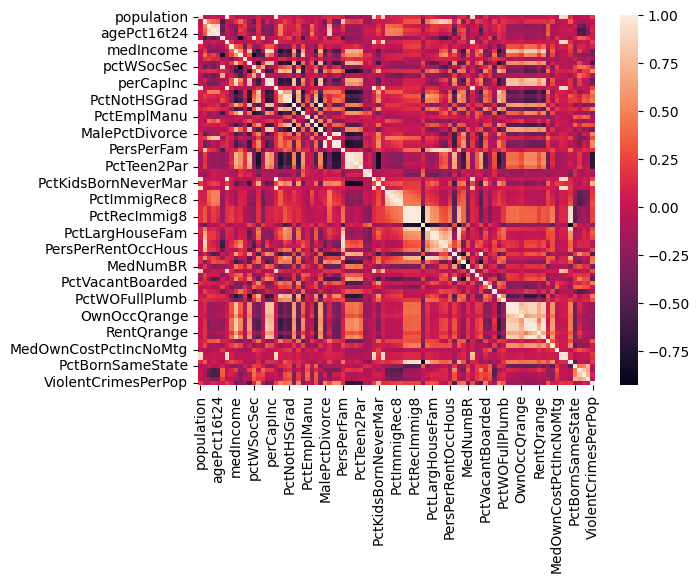

In [5]:
sns.heatmap(data.corr())

## Эконометрический подход

Попробуем построить линейную модель как на эконометрике, это позволяет сделать библиотека statsmodels.api.

Ее возможности и способ отображения повторяют уже знакомые Вам процедуры в R.

Проинтерпретируйте полученную модель
1. Оцените ее качество
2. Много ли значимых коэффициентов?

In [6]:
import statsmodels.api as sm

X= sm.add_constant (X)

model = sm.OLS (y, X.astype(float)).fit ()
print(model.summary ())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.666
Model:                             OLS   Adj. R-squared:                  0.651
Method:                  Least Squares   F-statistic:                     44.31
Date:                 Mon, 03 Feb 2025   Prob (F-statistic):               0.00
Time:                         13:49:23   Log-Likelihood:                -14538.
No. Observations:                 1994   AIC:                         2.925e+04
Df Residuals:                     1907   BIC:                         2.974e+04
Df Model:                           86                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

## Машинное обучение

Теперь поработаем с линейной регрессией не как эконометристы, а как ML-специалисты

1. Оцените качество линейной модели модели, пусть объем тестовой выборки будет 30%
2. Как Вы считаете, можно ли добиться более высокого? Если да, то как?

### Простейшее построение моделей

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LinearRegression().fit(X_train,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test))))

mse = mean_squared_error(y_test, lr.predict(X_test))
import math
rmse = math.sqrt(mse)
print("RMSE", rmse)

Train: 120588.49878102947
Test: 177957.26949817652
RMSE 421.8498186537201


589.0789217652958


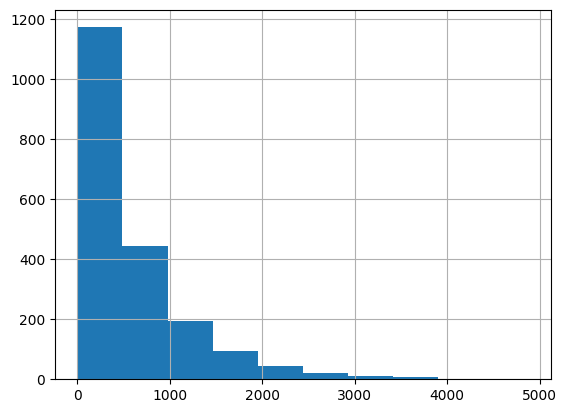

In [13]:
data['ViolentCrimesPerPop'].hist()
print(data['ViolentCrimesPerPop'].mean())

1. Вспомните, для чего нужна регуляризация?
2. Каких типов она бывает?

In [24]:
# Регуляризация L2
ridge = Ridge(2).fit(X_train,y_train)

print ("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test))))

Train: 120851.94023214017
Test: 176910.86531250586


### Практика: масштабирование + LASSO

В этот раз попробуем воспользоваться MinMax Scaler

In [25]:
sc = MinMaxScaler()
X_train_scaled = pd.DataFrame(data=sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=sc.transform(X_test), columns=X_test.columns)

Задание: Напишите код обучения линейной регресии на масштабированных признаках и выведите ошибку на обучающей и тестовой выборке

In [27]:
# YOUR CODE HERE
lr2 = LinearRegression().fit(X_train_scaled,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr2.predict(X_train_scaled))))
print ("Test: {}".format(mean_squared_error(y_test, lr2.predict(X_test_scaled))))

Train: 120646.7784707527
Test: 177013.44999899835


Задание: проделайте аналогичную работу, добавив LASSO регуляризацию (L1)

In [ ]:
# YOUR CODE HERE


### Отбор признаков: дисперсия

Важны ли признаки с высокой дисперсией? А с низкой?

Попробуем удалить признаки с самой низкой дисперсией и посмотреть, как изменится качество.

В sklearn есть специальный инструмент для такого наивного отбора признаков. Стоит ли нормализовать перед этим признаки?

In [28]:
features_variance = X_train_scaled.var().sort_values(ascending=False)
features_variance.head()

pctUrban          0.198180
RentHighQ         0.062276
MedYrHousBuilt    0.054046
OwnOccHiQuart     0.046500
MedRent           0.046184
dtype: float64

In [29]:
from sklearn.feature_selection import VarianceThreshold

# можно убрать все признаки, дисперсия которых меньше заданного значения
vs_transformer = VarianceThreshold(0.01)

X_train_var = pd.DataFrame(data=vs_transformer.fit_transform(X_train_scaled), columns=X_train_scaled.columns[vs_transformer.get_support()])
X_test_var = pd.DataFrame(data=vs_transformer.transform(X_test_scaled), columns=X_test_scaled.columns[vs_transformer.get_support()])

X_train_var.shape

(1395, 76)

In [30]:
lr = LinearRegression().fit(X_train_var,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train_var))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test_var))))

Train: 125862.35388316307
Test: 147086.5431172162


In [31]:
ridge = Ridge(3.0).fit(X_train_var,y_train)
print ("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train_var))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test_var))))

Train: 134439.39024201912
Test: 146475.0548937944


### Отбор признаков: корреляция

Можно выбрать k признаков, которые дают наиболее высокие значения корреляции с целевой переменной.

In [32]:
from sklearn.feature_selection import SelectKBest, f_regression

# Выбираем 15 лучших признаков
sb = SelectKBest(f_regression, k=15)

X_train_kbest = pd.DataFrame(data=sb.fit_transform(X_train_var, y_train), columns=X_train_var.columns[sb.get_support()])
X_test_kbest = pd.DataFrame(data=sb.transform(X_test_var), columns=X_test_var.columns[sb.get_support()])

In [33]:
lr = LinearRegression().fit(X_train_kbest,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train_kbest))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test_kbest))))

Train: 148611.20644386424
Test: 151992.7773104486


In [34]:
ridge = Ridge(0.3).fit(X_train_kbest,y_train)
print ("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train_kbest))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test_kbest))))

Train: 150778.78344217918
Test: 149867.57125542275


### Отбор признаков: LASSO

А можно выбрать самые значимые признаки с точки зрения регрессии с  L1-регуляризацией.

In [35]:
from sklearn.feature_selection import SelectFromModel

lasso = Lasso(5.0)
l1_select = SelectFromModel(lasso)

X_train_l1 = pd.DataFrame(data=l1_select.fit_transform(X_train_var, y_train), columns=X_train_var.columns[l1_select.get_support()])
X_test_l1 = pd.DataFrame(data=l1_select.transform(X_test_var), columns=X_test_var.columns[l1_select.get_support()])

X_train_l1.shape

(1395, 11)

In [36]:
lr = LinearRegression().fit(X_train_l1,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train_l1))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test_l1))))

ridge = Ridge(5.0).fit(X_train_l1,y_train)
print ("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train_l1))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test_l1))))

Train: 141386.8832015505
Test: 149799.23600736872
Train: 143768.55836490745
Test: 153055.64834445826


## ПРАКТИКА: соревнование

Разделите выборку на тестовую и обучающую, где в тестовой будет 30% наблюдений, поставьте random_state=5

Используя линейные модели (!), способы работы с данными и регуляризацию, выбейте минимальную ошибку MSE на тестовой выборке

Авторы пяти лучших моделей получают плюсик за семинар.

In [ ]:
# YOUR CODE HERE
